# ナイーブベイズ

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 訓練データ生成

In [2]:
x0 = np.random.normal(size=50).reshape(-1, 2) - 2
x1 = np.random.normal(size=50).reshape(-1, 2) + 2
x_train = np.concatenate([x0, x1])
y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

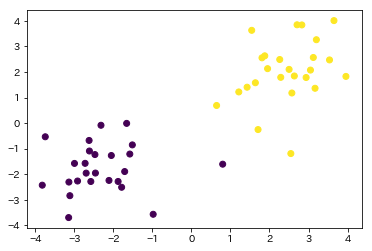

In [3]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

## 学習

ナイーブベイズでは、データ点$\boldsymbol{x} = (x_{1}, x_{2}, ..., x_{d})$の各特徴（次元）が互いに独立であることを仮定する。

すると、ラベル$y$の条件付き確率はベイズの定理を用いて、

$p(y | \boldsymbol{x}) = \frac{p(y) p(\boldsymbol{x} | y)}{p(\boldsymbol{x})} = \frac{p(y) \prod_{j=1}^{d} p(x_{j} | y)}{p(\boldsymbol{x})}$

$p(\boldsymbol{x})$は入力に対して定数なので、$p(y | \boldsymbol{x})  \propto p(y) \prod_{j=1}^{d} p(x_{j} | y)$。

よって訓練データ$X = [x_{1}, x_{2}, ..., x_{n}]^{\mathrm{T}}, \boldsymbol{y} = [y_{1}, y_{2}, ..., y_{n}]^{\mathrm{T}}$に対して最大化する目的関数は、

$L = \prod_{i=1}^{n} \left( p(y_{i}) \prod_{j=1}^{d} p(x_{ij} | y_{i}) \right)$

である。対数をとると、$\log{L} = \sum_{i=1}^{n} \left( \log{p(y_{i})}  + \sum_{j=1}^{d} \log{p(x_{ij} | y_{i})} \right)$

上のデータに対して、クラス$y$の事前分布$p(y_{i})$を一様分布、$p(x_{j} | y) = \mathcal{N} (x_{j} | \mu_{y}, \sigma^{2}) $とすると、最大化するのは、（パラメータに依存しない項を無視すると）以下の関数である。

$f(\boldsymbol{\mu}, \boldsymbol{\sigma}) = \sum_{i=1}^{n} \sum_{j=1}^{d} ( -\log{\sigma_{y_i}} - \frac{(x_{ij} - \mu_{y_i})^{2}}{2\sigma_{y_i}^{2}} )$

$\frac{\partial f}{\partial \mu_{k}} = \sum_{i=1}^{n} \sum_{j=1}^{d} \frac{(x_{ij} - \mu_{k})}{\sigma_{k}^{2}} \cdot \delta(y_{i} = k) = 0$

$\frac{\partial f}{\partial \sigma_{k}} = \sum_{i=1}^{n} \sum_{j=1}^{d} (- \frac{1}{\sigma_{k}} + \frac{(x_{ij} - \mu_{y_i})^{2}}{\sigma_{k}^{3}}) \cdot \delta(y_{i} = k) = 0$

よって、$\mu_{k} = \frac{1}{N_{k} d} \sum_{i=1}^{n} \sum_{j=1}^{d} x_{ij} \delta(y_{i} = k)$, $\sigma_{k}^{2} = \frac{1}{N_{k} d} \sum_{i=1}^{n} \sum_{j=1}^{d} (x_{ij} - \mu_{y_i})^{2} \delta(y_{i} = k)$である。

In [4]:
X_train = x_train
labels = list(set(y_train))

mu = {}
var = {}
for label in labels:
    index = y_train == label
    mu[label] = np.mean(X_train[index])
    var[label] = np.var(X_train[index])

## 予測

$p(y | \boldsymbol{x})  \propto p(y) \prod_{j=1}^{d} p(x_{j} | y)$なので、入力に対して$\log{p(y)} + \sum_{j=1}^{d} \log{p(x_{j} | y)}$が最大となるラベル$y$を割り当てればよい。

In [5]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

In [6]:
def log_gauss(x, mu, var):
    # 定数は無視
    return -np.log(var) - 0.5 * np.sum((x - mu)**2) / var

y_pred = np.empty(len(xx), dtype=y_train.dtype)
p = np.zeros(len(labels))
for i, x in enumerate(xx):
    for j, label in enumerate(labels):
        p[j] = log_gauss(x, mu[label], var[label])
    y_pred[i] = labels[np.argmax(p)]

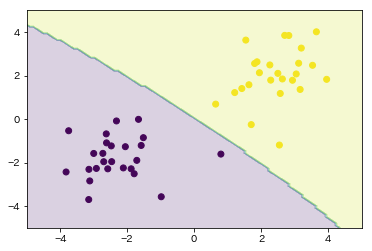

In [7]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2)